In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [20]:
birth = pd.read_csv("US_births_2000-2014_SSA.csv", sep = ",")

In [21]:
birth

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [22]:
birth.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [24]:
birth.dtypes

year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object

In [25]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           5479 non-null   int64
 1   month          5479 non-null   int64
 2   date_of_month  5479 non-null   int64
 3   day_of_week    5479 non-null   int64
 4   births         5479 non-null   int64
dtypes: int64(5)
memory usage: 214.1 KB


In [54]:
# Jours où il y a eu moins de 6500 naissances
birth[birth.births < 6500]

,year,month,date_of_month,day_of_week,births
1820,2004,12,25,6,6259
2185,2005,12,25,7,6224
2550,2006,12,25,1,6409
3281,2008,12,25,4,6471
3646,2009,12,25,5,6160
4011,2010,12,25,6,6159
4376,2011,12,25,7,5728
4453,2012,3,11,7,6497
4742,2012,12,25,2,6325


In [34]:
# 5 jours ayant eu le plus de naissances
birth.sort_values(by='births')[-5:]

,year,month,date_of_month,day_of_week,births
2441,2006,9,7,4,15454
2918,2007,12,28,5,15555
2917,2007,12,27,4,15590
3286,2008,12,30,2,15645
3539,2009,9,9,3,16081


In [79]:
# Le mois ayant eu le moins de naissances
birth.groupby("month").births.sum().sort_values()[:1]

month
2    4725693
Name: births, dtype: int64

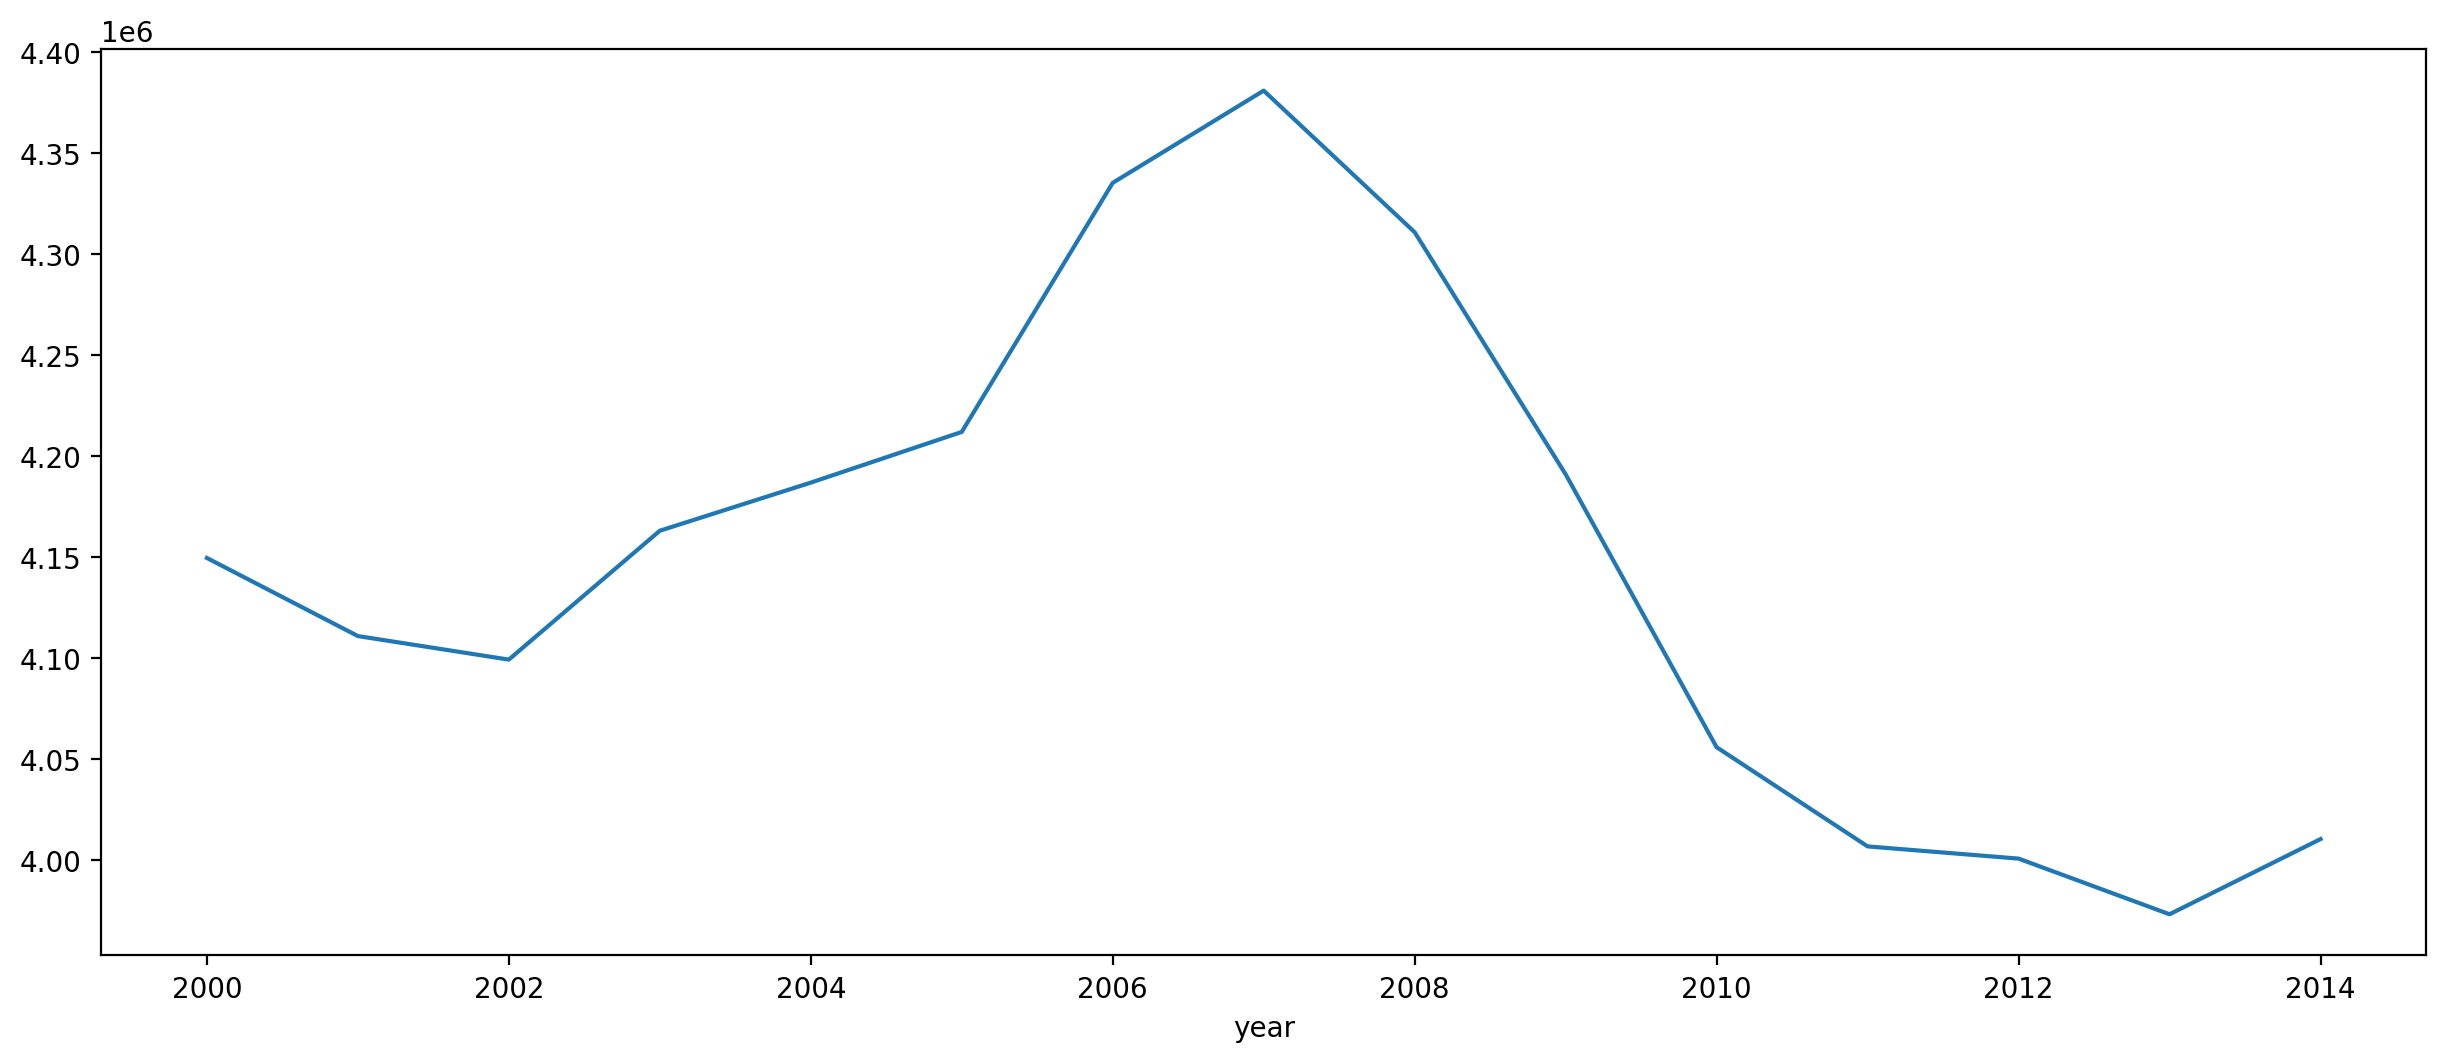

In [89]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
# Nombre de naissances par an
birth.groupby("year").births.sum().plot()

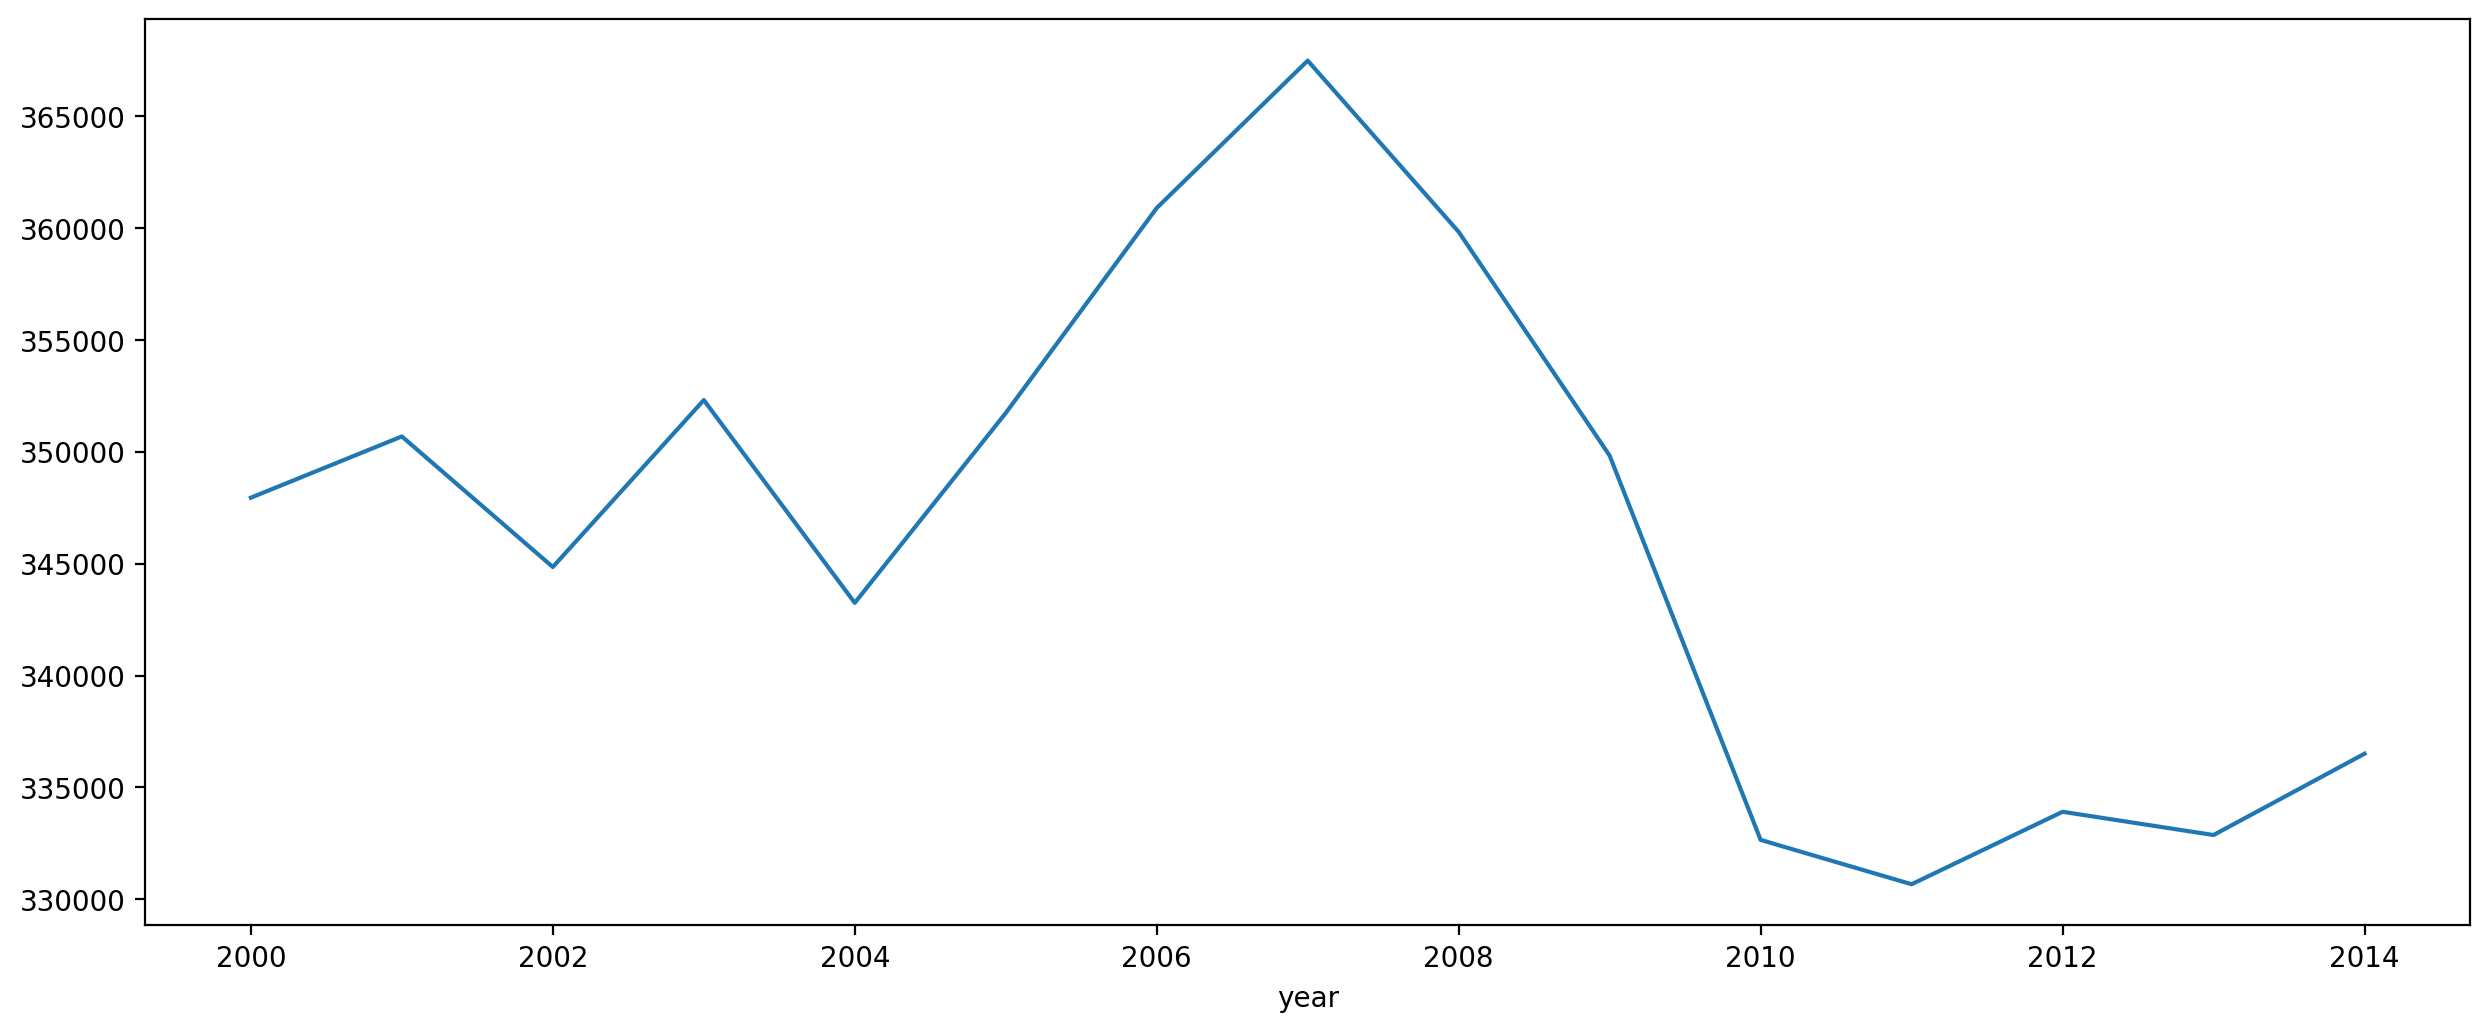

In [90]:
# Nombre de naissances au mois de mai par an
birth[(birth.month==5)].groupby("year").births.sum().plot()

In [92]:
# Nombre de naissances par an par mois.
birth_monthly=birth.pivot_table('births',index='year',columns='month',aggfunc=sum)
birth_monthly

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,337739,324046,347824,323357,347950,347899,356131,367893,355981,352368,342494,345916
2001,342379,309819,345345,329884,350689,337606,358079,369383,349988,351852,331276,334663
2002,337472,309910,337349,330289,344851,333432,363960,366409,355701,352738,325379,341823
2003,336163,312789,342574,335691,352315,342884,370236,366421,366321,360634,326388,350644
2004,339077,321348,352379,339079,343248,350876,365380,361835,362895,355048,342359,353339
2005,337478,314890,355121,338060,351736,356576,363196,376467,370354,351161,342182,354720
2006,345976,324435,362520,334587,360901,363615,373445,394199,381204,373685,357976,362611
2007,360521,331617,365888,342981,367491,363486,384861,396355,372774,375272,359335,360203
2008,361868,343354,355484,351344,359835,353430,380707,379046,373625,363420,328905,359719


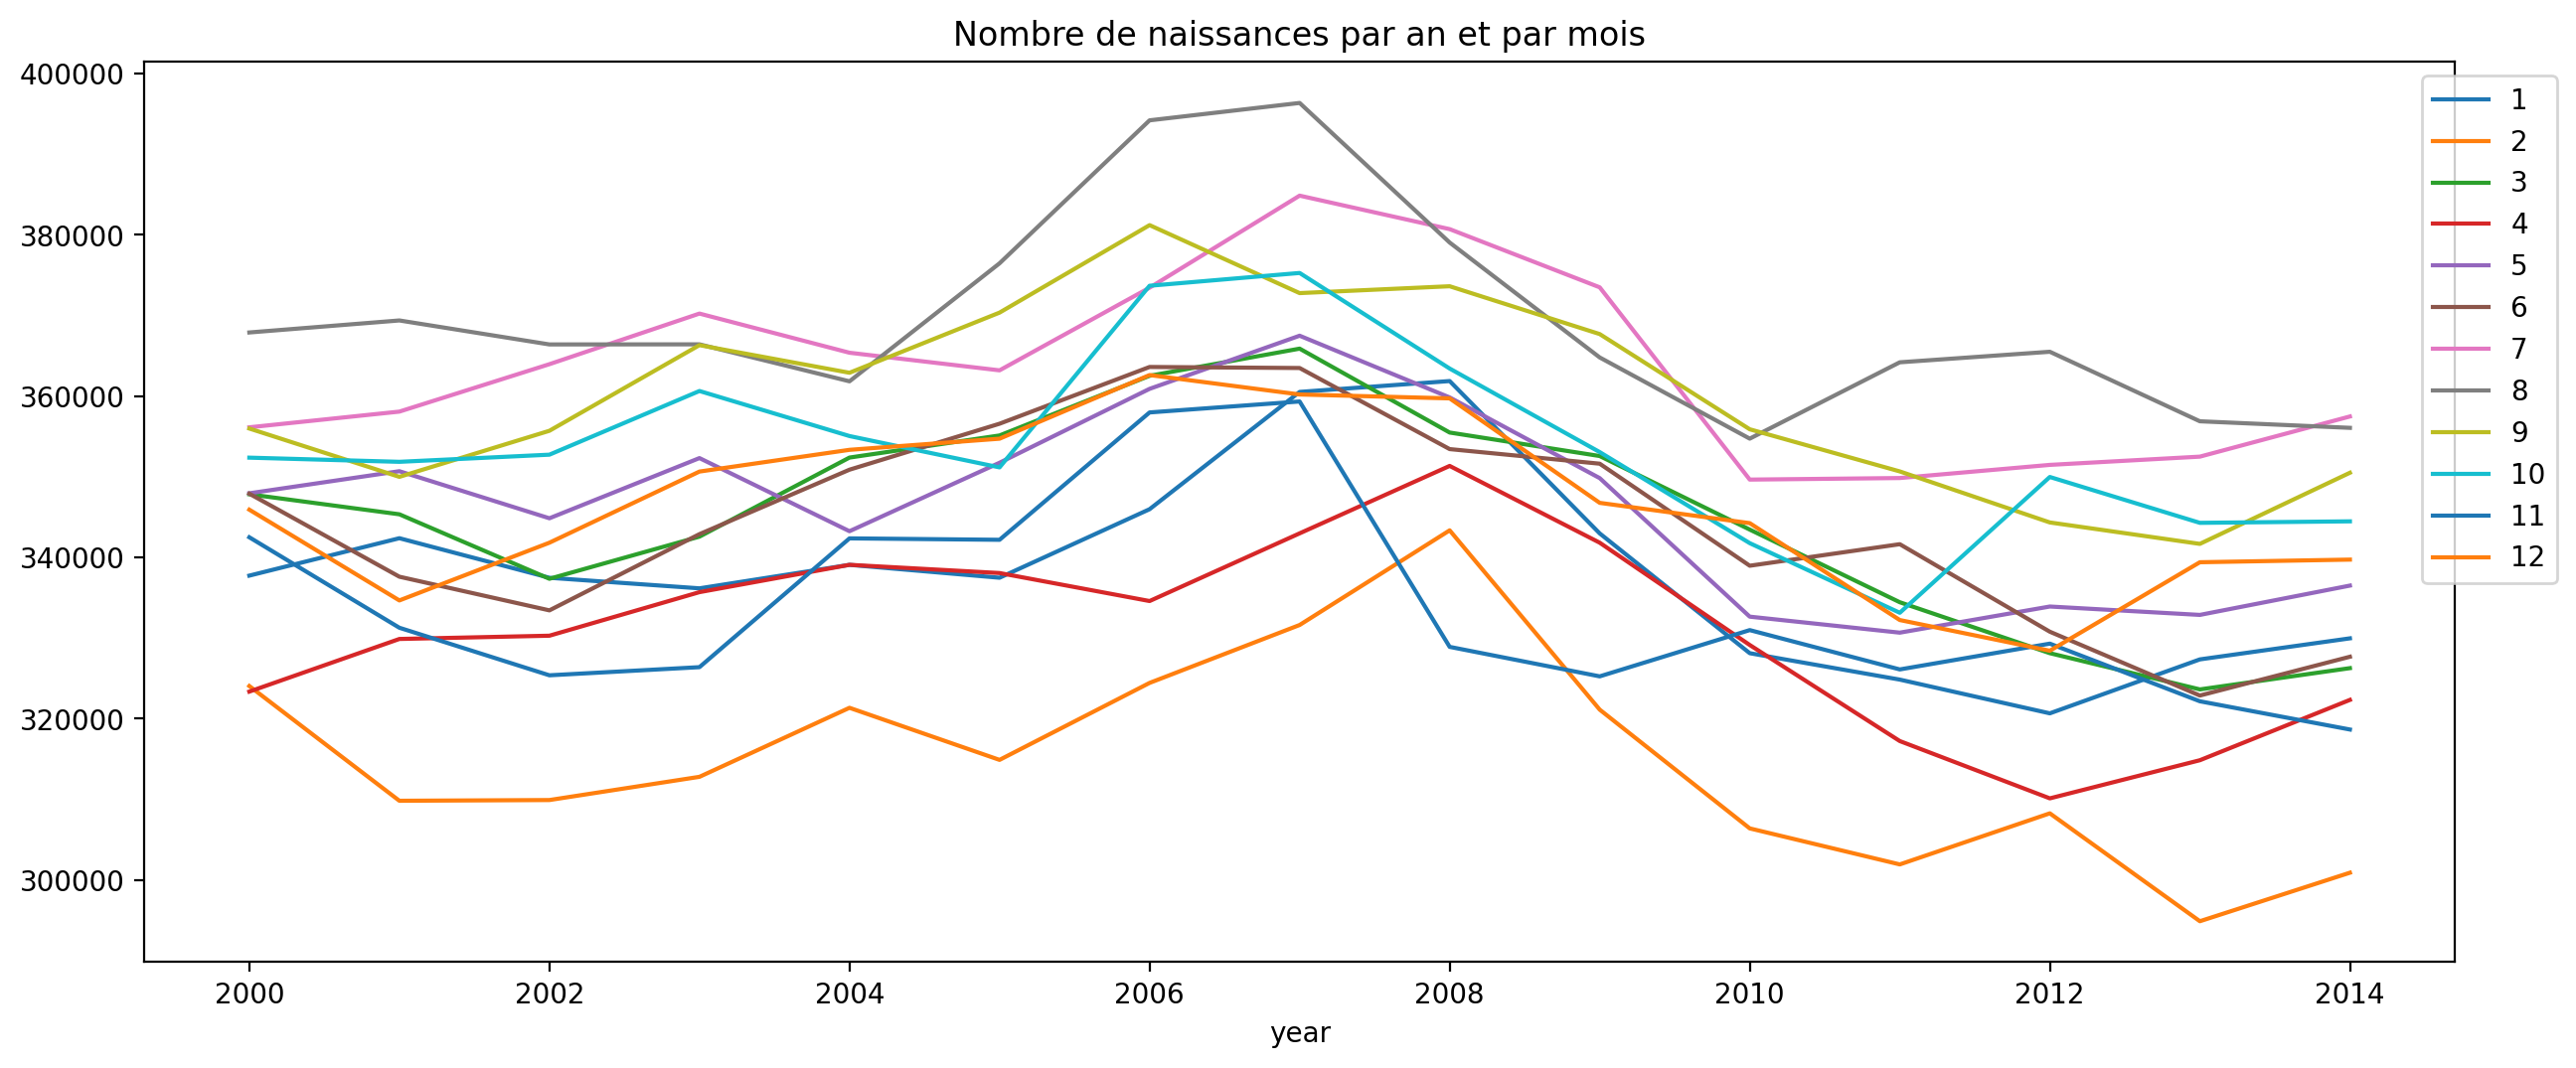

In [98]:
birth_monthly.plot(title="Nombre de naissances par an et par mois")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')